In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, RidgeClassifier
from sklearn import datasets, metrics
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import time

samples = 2428
seed = 244828
times = 100

# samples = 2481
# seed = 244881

X, Y  = datasets.make_classification(n_features=2, n_redundant=0, n_classes=2, n_clusters_per_class=1, random_state=seed, n_samples=samples)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.8, test_size=0.2, random_state=seed)

# print(X_test)
# print(Y_test)

In [3]:
def normalize(matrix):
    return (matrix - np.min(matrix))/(np.max(matrix) - np.min(matrix))

# X_train = normalize(X_train)
# Y_train = normalize(Y_train)
# X_test = normalize(X_test)
# Y_test = normalize(Y_test)

# print(X_test)
# print(Y_test)

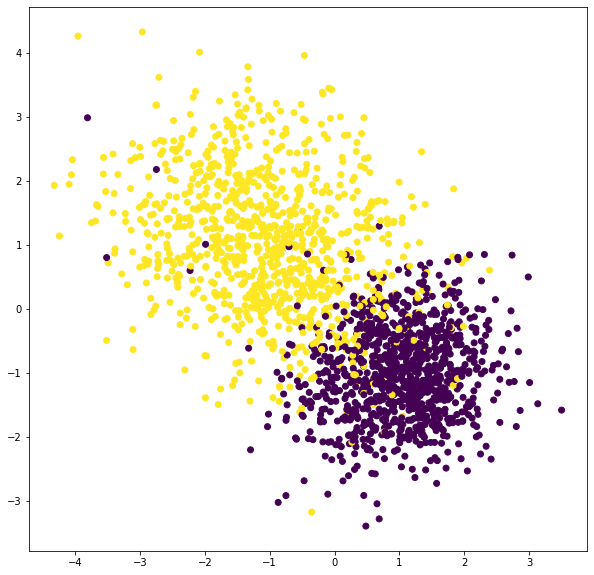

In [4]:
plt.figure(figsize=(10,10))
plt.scatter(X_train[:, 0], X_train[:, 1], c=Y_train)

### Regularyzacja Tichonowa
###  $$ (X^T*X + λI)^{-1}*X^T*Y$$

In [5]:
def ridge_regression(X,y,alpha):            
    I = np.identity(X.shape[1])                        
    ridge = np.linalg.pinv(X.T @ X + alpha * I) @ X.T @ y
    return ridge

def my_prediction(theta, XY):
    Y_pred = XY @ theta
    mean = np.mean(Y_pred)
    
    ans = []
    for x in Y_pred:
        if x >= mean:
            ans.append(1.0)
        else:
            ans.append(0)
    return np.asarray(ans)

start_time_my = time.time()

for i in range(times):
    ridge = ridge_regression(X_train, Y_train, alpha = 1e-100)
end_time_my = (time.time() - start_time_my)/times
alpha_my = ridge[1]
beta_my = ridge[0]
my_pred = my_prediction(ridge, X_test)
acc_my = metrics.accuracy_score(my_pred, Y_test)

### RidgeClassifier

In [6]:
start_time_ri = time.time()
for i in range(times):
    model_ridge = RidgeClassifier(alpha=2e-16)
    model_ridge.fit(X_train, Y_train)
end_time_ri = (time.time() - start_time_ri)/times

alpha_ridge = model_ridge.coef_[0][1]
beta_ridge = model_ridge.coef_[0][0]

sk_pred = model_ridge.predict(X_test)
acc_sk = metrics.accuracy_score(sk_pred, Y_test)

### Wyniki

<function matplotlib.pyplot.show(close=None, block=None)>

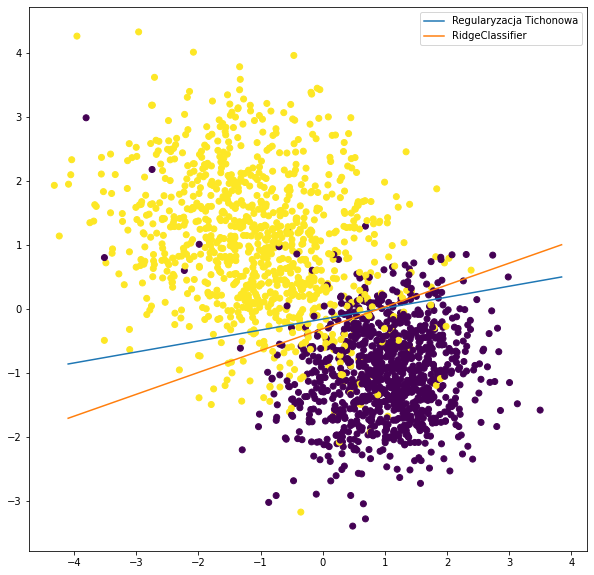

In [7]:
X_interval = np.array([min(X_test[:,0]), max(X_test[:,0])])
# X_interval = np.array([0, 1])

plt.figure(figsize=(10,10))
plt.scatter(X_train[:, 0], X_train[:, 1], c=Y_train)
plt.plot(X_interval, [alpha_my*X_interval[0] + beta_my, alpha_my*X_interval[1] + beta_my], label = "Regularyzacja Tichonowa")
plt.plot(X_interval, [alpha_ridge*X_interval[0] + beta_ridge, alpha_ridge*X_interval[1] + beta_ridge], label = "RidgeClassifier")
plt.legend()
plt.show

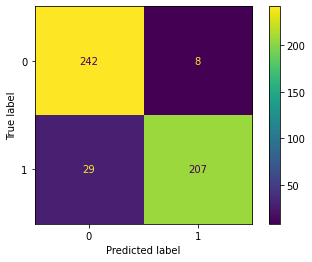

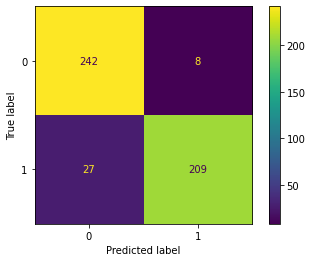

In [8]:
my_cm = metrics.confusion_matrix(Y_test, my_pred)
my_disp = metrics.ConfusionMatrixDisplay(confusion_matrix=my_cm)
my_disp.plot()

sk_cm = metrics.confusion_matrix(Y_test, sk_pred)
sk_disp = metrics.ConfusionMatrixDisplay(confusion_matrix=sk_cm)
sk_disp.plot()

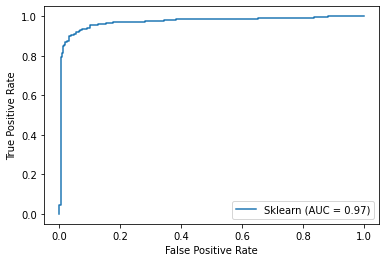

In [10]:
fpr, tpr, thresholds = metrics.roc_curve(Y_test, X_test @ ridge)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='Implementacja własna')
display.plot()

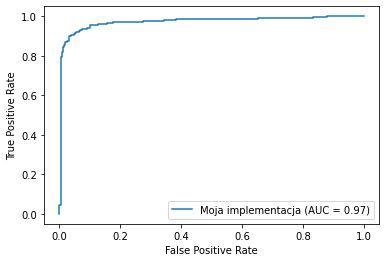

In [12]:
fpr, tpr, thresholds = metrics.roc_curve(Y_test, model_ridge.decision_function(X_test))
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='SKlEARN')
display.plot()

In [8]:
print(f'Czas pracy dla mojej implementacji: {end_time_my}')
print(f'Celność mojej implementacji: {acc_my}')
print(f'Czas pracy dla RidgeClassifier: {end_time_ri}')
print(f'Celność mojej implementacji: {acc_sk}')
print("Specifoczność RidgeClassifier: ",sk_cm[1][1]/(sk_cm[0][0]+sk_cm[1][1]))
print("Specyficzność własnej implementacji: ",my_cm[1][1]/(my_cm[0][0]+my_cm[1][1]))

Czas pracy dla mojej implementacji: 0.00017999887466430665
Celność mojej implementacji: 0.9238683127572016
Czas pracy dla RidgeClassifier: 0.0024399948120117187
Celność mojej implementacji: 0.9279835390946503
Specifoczność RidgeClassifier:  0.4634146341463415
Specyficzność własnej implementacji:  0.4610244988864143


### Zbiór cleveland

In [9]:
column_name = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num']

df = pd.read_csv("HeartCleveland.csv", names = column_name) 
df

age  sex   cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  \
0    63.0  1.0  1.0     145.0  233.0  1.0      2.0    150.0    0.0      2.3   
1    67.0  1.0  4.0     160.0  286.0  0.0      2.0    108.0    1.0      1.5   
2    67.0  1.0  4.0     120.0  229.0  0.0      2.0    129.0    1.0      2.6   
3    37.0  1.0  3.0     130.0  250.0  0.0      0.0    187.0    0.0      3.5   
4    41.0  0.0  2.0     130.0  204.0  0.0      2.0    172.0    0.0      1.4   
..    ...  ...  ...       ...    ...  ...      ...      ...    ...      ...   
298  45.0  1.0  1.0     110.0  264.0  0.0      0.0    132.0    0.0      1.2   
299  68.0  1.0  4.0     144.0  193.0  1.0      0.0    141.0    0.0      3.4   
300  57.0  1.0  4.0     130.0  131.0  0.0      0.0    115.0    1.0      1.2   
301  57.0  0.0  2.0     130.0  236.0  0.0      2.0    174.0    0.0      0.0   
302  38.0  1.0  3.0     138.0  175.0  0.0      0.0    173.0    0.0      0.0   

     slope   ca thal  num  
0      3.0  0.0  6.0    0  
1      2.0  3.0  3.0    2  
2      2.0  2.0  7.0    1  
3      3.0  0.0  3.0    0  
4      1.0  0.0  3.0    0  
..     ...  ...  ...  ...  
298    2.0  0.0  7.0    1  
299    2.0  2.0  7.0    2  
300    2.0  1.0  7.0    3  
301    2.0  1.0  3.0    1  
302    1.0    ?  3.0    0  

[303 rows x 14 columns]

In [10]:
for column in column_name:
    print(df[df[column] == '?'].index)
    

Int64Index([], dtype='int64')
Int64Index([], dtype='int64')
Int64Index([], dtype='int64')
Int64Index([], dtype='int64')
Int64Index([], dtype='int64')
Int64Index([], dtype='int64')
Int64Index([], dtype='int64')
Int64Index([], dtype='int64')
Int64Index([], dtype='int64')
Int64Index([], dtype='int64')
Int64Index([], dtype='int64')
Int64Index([166, 192, 287, 302], dtype='int64')
Int64Index([87, 266], dtype='int64')
Int64Index([], dtype='int64')


In [11]:
for column in column_name:
    df = df.drop(df.index[df[column] == '?'])
    
df

age  sex   cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  \
0    63.0  1.0  1.0     145.0  233.0  1.0      2.0    150.0    0.0      2.3   
1    67.0  1.0  4.0     160.0  286.0  0.0      2.0    108.0    1.0      1.5   
2    67.0  1.0  4.0     120.0  229.0  0.0      2.0    129.0    1.0      2.6   
3    37.0  1.0  3.0     130.0  250.0  0.0      0.0    187.0    0.0      3.5   
4    41.0  0.0  2.0     130.0  204.0  0.0      2.0    172.0    0.0      1.4   
..    ...  ...  ...       ...    ...  ...      ...      ...    ...      ...   
297  57.0  0.0  4.0     140.0  241.0  0.0      0.0    123.0    1.0      0.2   
298  45.0  1.0  1.0     110.0  264.0  0.0      0.0    132.0    0.0      1.2   
299  68.0  1.0  4.0     144.0  193.0  1.0      0.0    141.0    0.0      3.4   
300  57.0  1.0  4.0     130.0  131.0  0.0      0.0    115.0    1.0      1.2   
301  57.0  0.0  2.0     130.0  236.0  0.0      2.0    174.0    0.0      0.0   

     slope   ca thal  num  
0      3.0  0.0  6.0    0  
1      2.0  3.0  3.0    2  
2      2.0  2.0  7.0    1  
3      3.0  0.0  3.0    0  
4      1.0  0.0  3.0    0  
..     ...  ...  ...  ...  
297    2.0  0.0  7.0    1  
298    2.0  0.0  7.0    1  
299    2.0  2.0  7.0    2  
300    2.0  1.0  7.0    3  
301    2.0  1.0  3.0    1  

[297 rows x 14 columns]

In [12]:
df.loc[df['num'] > 0,'num'] = 1
df.loc[df['num'] == 0, 'num'] = -1

In [13]:

column_discreet = ['trestbps', 'chol', 'thalach','oldpeak']
column_Still = ['age']
column_categorical  = ['sex', 'cp', 'fbs', 'restecg','exang','slope', 'ca', 'thal', 'num']
df = df.apply(pd.to_numeric) 

data_dic_discreet = {}
for column in column_discreet:
    data_series = pd.Series({
        'mean': df[column].mean(),
        'std': df[column].std(),
        'max': df[column].max(),
        'min': df[column].min()})
    data_series.to_frame()

    data_dic_discreet[column] = data_series
    
data_dic_Still = {}
for column in column_Still:
    mean_col = df[column].mean()
    mean_col = round(mean_col)
    
    data_series = pd.Series({
        'mean': mean_col,
        'std': df[column].std(),
        'max': df[column].max(),
        'min': df[column].min()})
    
    data_series.to_frame()
    data_dic_Still[column] = data_series
    
data_dic_categorical = {}    
for column in column_categorical:
    dom_col = df[column].mode()
    dom_col = dom_col[0]
    
    data_series = pd.Series({
        'dominant': dom_col,
        'std': df[column].std(),
        'max': df[column].max(),
        'min': df[column].min()})
    
    data_series.to_frame()
    data_dic_categorical[column] = data_series
    
print(data_dic_discreet)
print(data_dic_Still)
print(data_dic_categorical)

{'trestbps': mean    131.693603
std      17.762806
max     200.000000
min      94.000000
dtype: float64, 'chol': mean    247.350168
std      51.997583
max     564.000000
min     126.000000
dtype: float64, 'thalach': mean    149.599327
std      22.941562
max     202.000000
min      71.000000
dtype: float64, 'oldpeak': mean    1.055556
std     1.166123
max     6.200000
min     0.000000
dtype: float64}
{'age': mean    55.000000
std      9.049736
max     77.000000
min     29.000000
dtype: float64}
{'sex': dominant    1.0000
std         0.4685
max         1.0000
min         0.0000
dtype: float64, 'cp': dominant    4.000000
std         0.964859
max         4.000000
min         1.000000
dtype: float64, 'fbs': dominant    0.000000
std         0.352474
max         1.000000
min         0.000000
dtype: float64, 'restecg': dominant    0.000000
std         0.994914
max         2.000000
min         0.000000
dtype: float64, 'exang': dominant    0.000000
std         0.469761
max         1.000000
min  